In [1]:
%cd pytorch-image-models
!pwd

/Users/hieuphandinhminh/Desktop/Repo/Python/test-timm/pytorch-image-models
/Users/hieuphandinhminh/Desktop/Repo/Python/test-timm/pytorch-image-models


In [2]:
import timm
checkpoint_path = './output/train/20230312-154938-tnt_s_patch16_224-224/model_best.pth.tar'
model = timm.create_model('tnt_s_patch16_224',pretrained=False, checkpoint_path=checkpoint_path,num_classes=4).eval()



/Users/hieuphandinhminh/Desktop/Repo/Python/test-timm/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load sample image

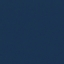

In [40]:
from PIL import Image

image_path = '../Satellite/train/water/SeaLake_2857.jpg'
image = Image.open(image_path)
image

Load transform from model

In [41]:
transform = timm.data.create_transform(
    **timm.data.resolve_data_config(model.pretrained_cfg)
)

We can prepare this image for the model by passing it to the transform.

In [42]:
image_tensor = transform(image)
image_tensor.shape

torch.Size([3, 224, 224])

Now we can pass that image to the model to get the predictions. We use unsqueeze(0) in this case, as the model is expecting a batch dimension.

In [43]:
output = model(image_tensor.unsqueeze(0))

To get the predicted probabilities, we apply softmax to the output. This leaves us with a tensor of shape (num_classes,).

In [44]:
import torch
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([4])

Now we’ll find the top 5 predicted class indexes and values using torch.topk.

In [45]:
values, indices = torch.topk(probabilities, 4)
labels = ["cloudy", "desert", "forest", "water"]
[{'label': labels[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'water', 'value': 0.8497885465621948},
 {'label': 'forest', 'value': 0.10480119287967682},
 {'label': 'desert', 'value': 0.02495712600648403},
 {'label': 'cloudy', 'value': 0.020453084260225296}]